In [24]:
import os

import omrmodules
import torch
import cv2 as cv

import numpy as np
from omrmodules.datasets.MuscimaMeasures import visualize_bboxes

In [23]:

###
# preparation
IMAGE = os.path.join('..', 'samples', 'aural_tests.jpg')

# load models
MODEL_MEASURE = os.path.join('..', 'saved_models', 'muscima_measures.pt')
MODEL_OBJECT = os.path.join('..', 'saved_models', 'muscima_objects_pitchonly.pt')
model_measures = torch.load(MODEL_MEASURE, map_location=torch.device('cpu'))
model_objects = torch.load(MODEL_OBJECT, map_location=torch.device('cpu'))
model_measures.eval()
model_objects.eval()
model_measures([torch.rand(1,400,400)])
model_objects([torch.rand(1,400,400)])
    
###
#

# read image
image = cv.imread(IMAGE)

# pre-process image
image = omrmodules.normalization.preprocess.processnotesheet(image)

# model inference
image = (np.expand_dims(image, 0) / 255.0).astype(np.float32)
image = [torch.from_numpy(image)]
measure_dict = model_measures(image)
object_dict = model_objects(image)

# pass results to SongFactory
songFactory = omrmodules.semantics.SystemObjects.SongFactory(image[0], measure_dict[0], object_dict[0])

# Write to JSON

    
print('done')


1.18
[0.09868725]
[0.35948068]
1
[0.3718611  0.55966175 0.72884226]
[0.52770674 0.7173601  0.8992993 ]
3
[0.08660689 0.559381   0.73733056]
[0.38090405 0.7219102  0.90205294]
3
[0.09387174 0.7255974 ]
[0.36442113 0.9001164 ]
2
[0.09397947 0.56683445]
[0.38342848 0.72211087]
2
[0.09002689]
[0.40799966]
1
[0.6605019]
[0.8907177]
1
[0.09664699]
[0.3994052]
1


KeyError: 'center'

In [21]:
# read image
image = cv.imread(IMAGE)

# pre-process image
image_processed = omrmodules.normalization.preprocess.processnotesheet(image)

# model inference
image = (np.moveaxis(image, 2, 0) / 255.0).astype(np.float32)
image = [torch.from_numpy(image)]
measure_dict = model_measures(image)
object_dict = model_objects(image)

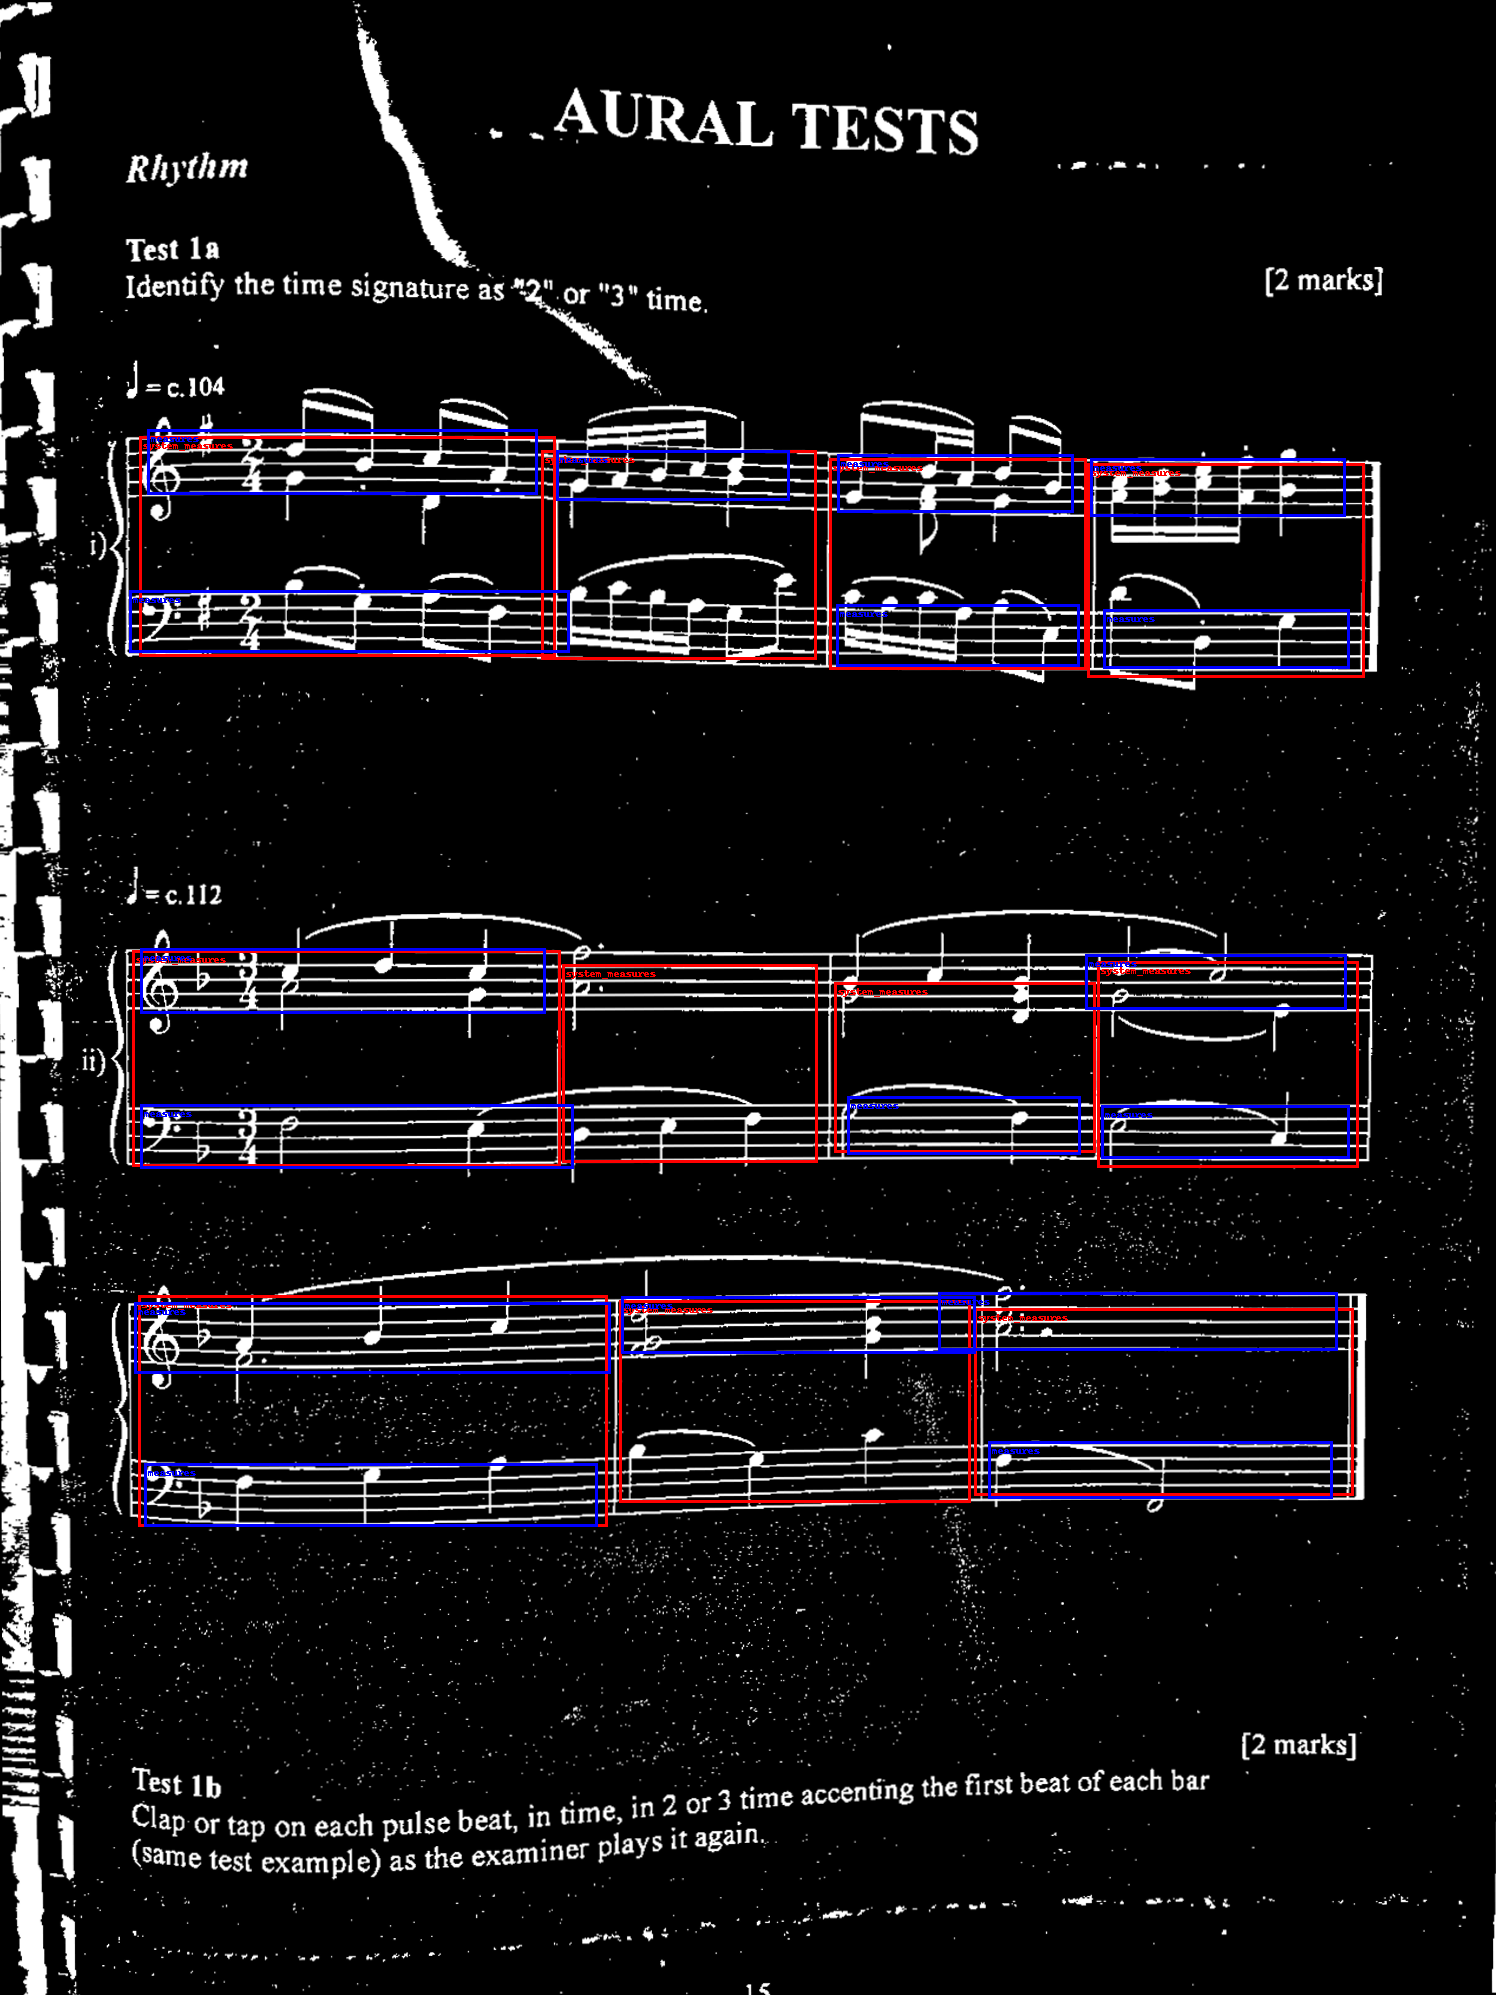

In [25]:
visualize_bboxes(image[0], measure_dict[0])

In [28]:
import importlib
importlib.reload(omrmodules.semantics.SystemObjects)

<module 'omrmodules.semantics.SystemObjects' from 'c:\\Repositories\\omrtorch\\omrmodules\\semantics\\SystemObjects.py'>

In [29]:
songFactory = omrmodules.semantics.SystemObjects.SongFactory(image[0], measure_dict[0], object_dict[0])

[0.09868725]
[0.35948068]
1
[0.3718611  0.55966175 0.72884226]
[0.52770674 0.7173601  0.8992993 ]
3
[0.08660689 0.559381   0.73733056]
[0.38090405 0.7219102  0.90205294]
3
[0.09387174 0.7255974 ]
[0.36442113 0.9001164 ]
2
[0.09397947 0.56683445]
[0.38342848 0.72211087]
2
[0.09002689]
[0.40799966]
1
[0.6605019]
[0.8907177]
1
[0.09664699]
[0.3994052]
1


NameError: name 'songFactory' is not defined

In [16]:
image = cv.imread(IMAGE)

image_processed = omrmodules.normalization.preprocess.processnotesheet(image)

1.18


In [18]:
image_processed.shape

(1995, 1496)

In [20]:
np.expand_dims(image_processed, 0)

(1, 1995, 1496)

In [21]:
from PIL import Image

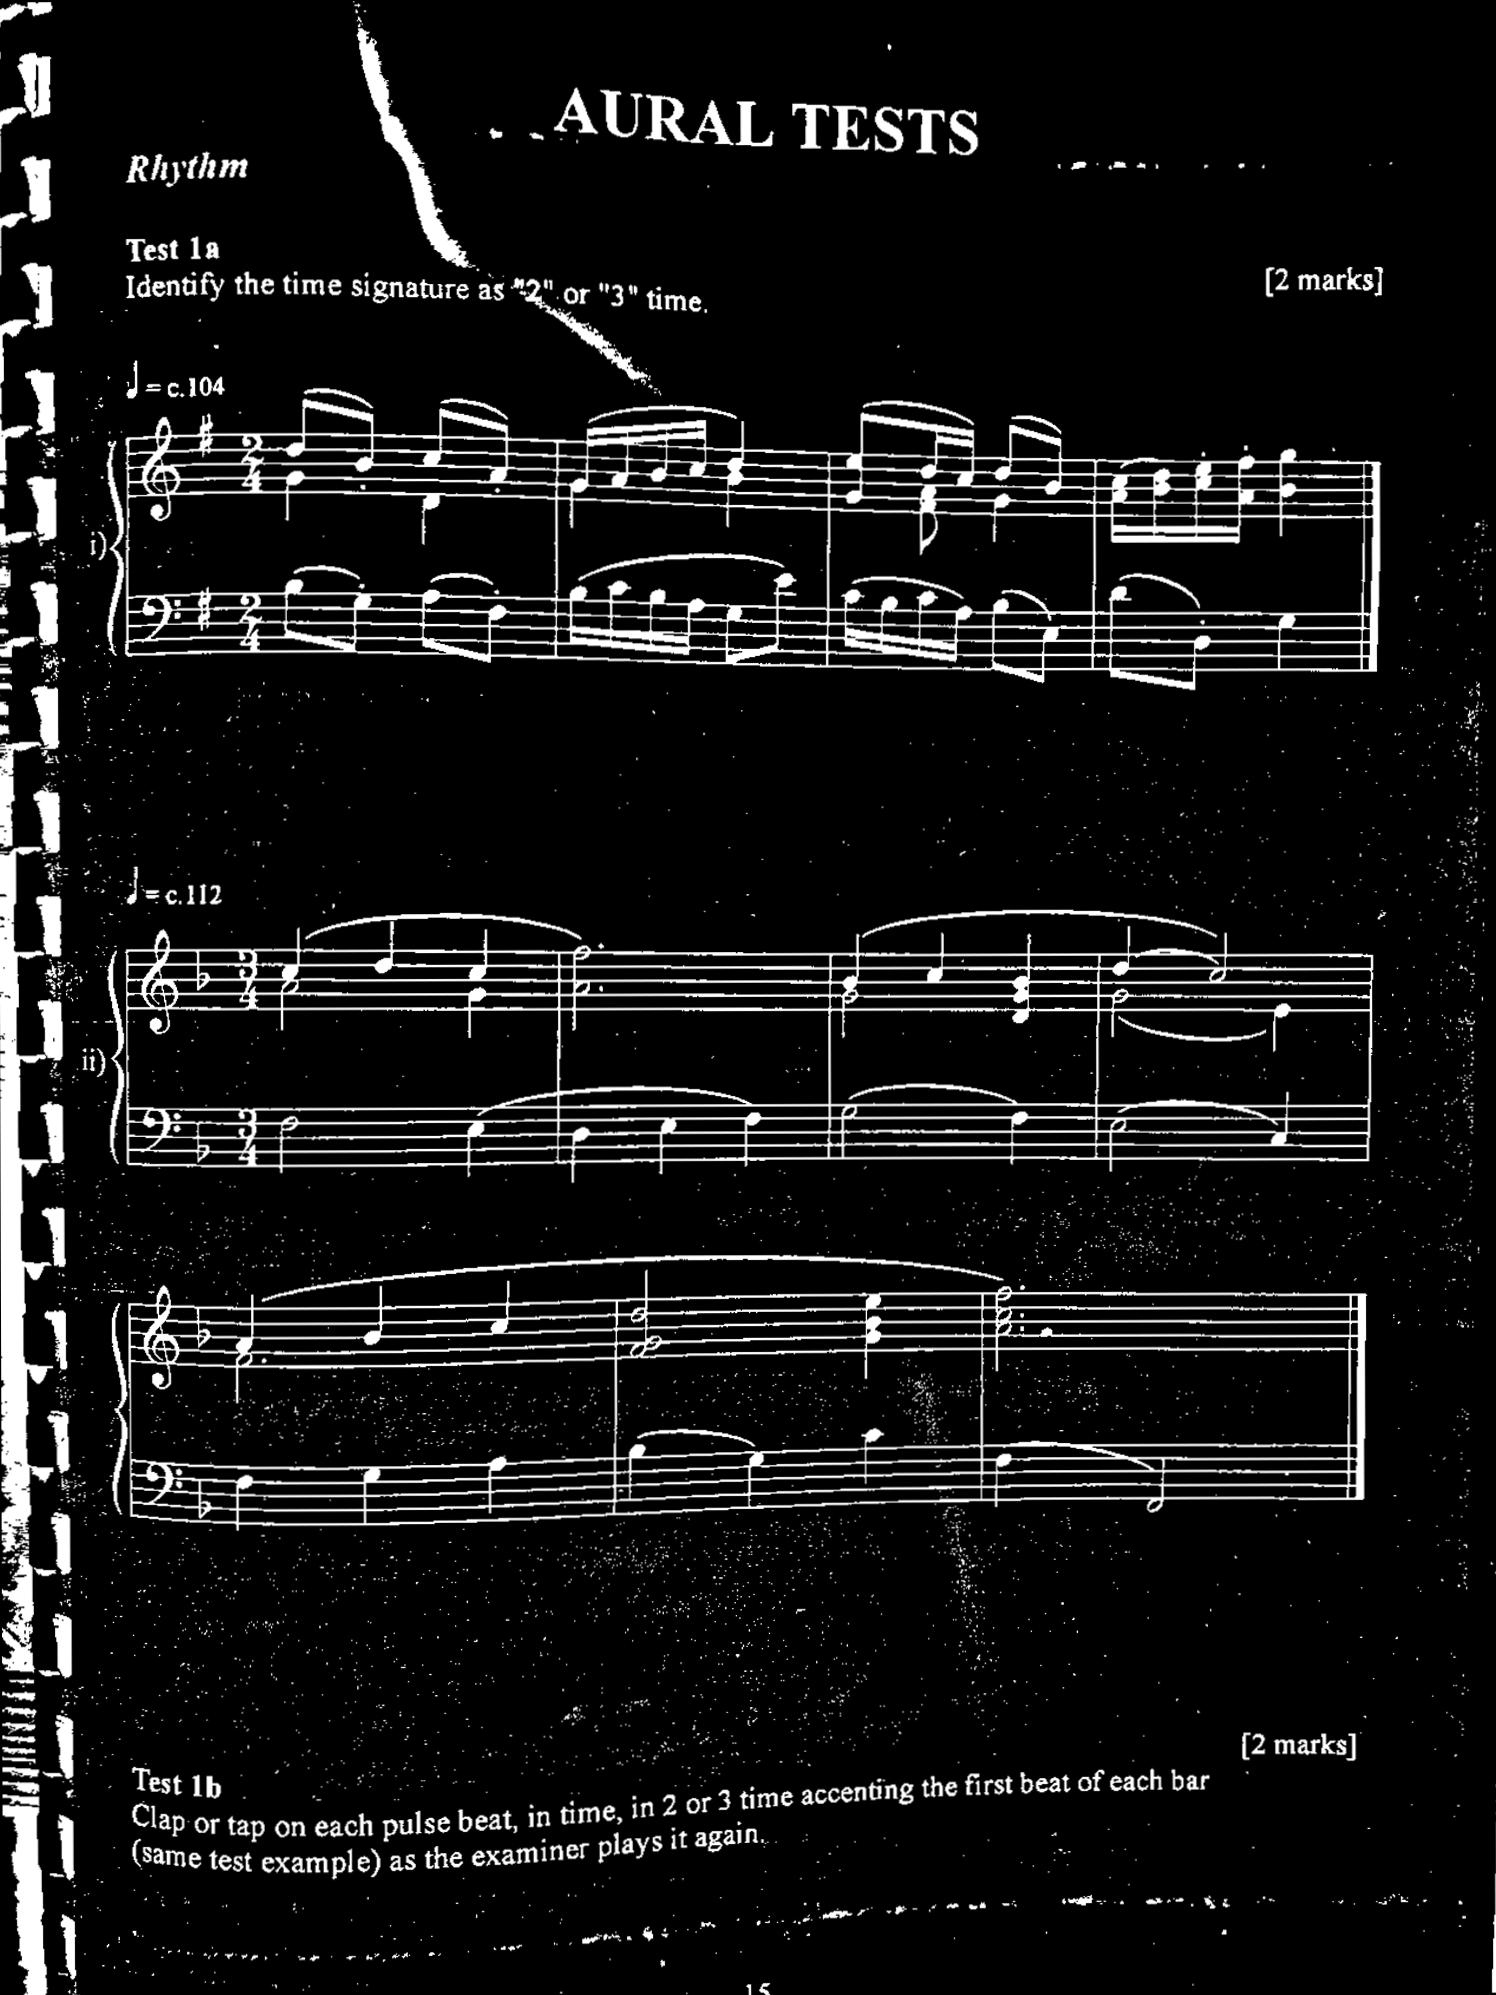

In [22]:
Image.fromarray(image_processed)